In [8]:
# Necessary Library
%matplotlib inline
import pandas as pd
import numpy as np
#import pandas_profiling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import roc_auc_score, confusion_matrix, recall_score, precision_score
from sklearn.metrics import roc_curve, precision_recall_curve, classification_report

import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [9]:
#load the data to dataframe
data = pd.read_csv("bank-additional-full.csv", sep = ";")

# Preprocessing

In [95]:
pandas_profiling.ProfileReport(data)

Number of variables,21
Number of observations,41188
Total Missing (%),0.0%
Total size in memory,6.6 MiB
Average record size in memory,168.0 B
Numeric,8
Categorical,11
Boolean,0
Date,0
Text (Unique),0
Rejected,2


In [10]:
data.duplicated().sum()

12

In [11]:
data.drop_duplicates(inplace = True)

In [12]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [13]:
data['y'].value_counts()

no     36537
yes     4639
Name: y, dtype: int64

In [14]:
data["y"].unique()

array(['no', 'yes'], dtype=object)

In [15]:
data["y"].replace({"yes":1,"no":0}, inplace = True)

##### duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [16]:
data.drop(columns="duration", inplace = True)

In [17]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [18]:
data["month"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [19]:
data["day_of_week"].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [20]:
data["job"].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [21]:
data["job"].value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [22]:
data = data[data["job"]!="unknown"]

In [23]:
data["job"].value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

In [24]:
data["marital"].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [25]:
data["marital"].value_counts()

married     24687
single      11490
divorced     4598
unknown        71
Name: marital, dtype: int64

In [26]:
data = data[data["marital"]!="unknown"]

In [27]:
data["marital"].value_counts()

married     24687
single      11490
divorced     4598
Name: marital, dtype: int64

In [28]:
data["education"].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [29]:
data["education"].value_counts()

university.degree      12092
high.school             9461
basic.9y                6006
professional.course     5222
basic.4y                4118
basic.6y                2263
unknown                 1595
illiterate                18
Name: education, dtype: int64

In [30]:
np.where(data["education"]=="basic.9y","basic",data["education"])

array(['basic.4y', 'high.school', 'high.school', ..., 'university.degree',
       'professional.course', 'professional.course'], dtype=object)

In [31]:
data["education"] = data["education"].replace({"basic.4y":"basic","basic.6y":"basic","basic.9y":"basic"})

In [32]:
data["education"].value_counts()

basic                  12387
university.degree      12092
high.school             9461
professional.course     5222
unknown                 1595
illiterate                18
Name: education, dtype: int64

In [33]:
data.loc[data["education"]=="unknown","education"] = np.NAN

In [34]:
data["education"].value_counts()

basic                  12387
university.degree      12092
high.school             9461
professional.course     5222
illiterate                18
Name: education, dtype: int64

In [35]:
data["education"].isna().sum()

1595

In [36]:
data["education"] = data.groupby("job")["education"].transform(lambda x : x.fillna(x.mode()[0]))

In [37]:
data["default"].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [38]:
data["default"].value_counts()

no         32337
unknown     8435
yes            3
Name: default, dtype: int64

In [39]:
pd.crosstab(data["default"],data["y"])

y,0,1
default,,
no,28180,4157
unknown,7999,436
yes,3,0


In [40]:
data[data["default"]=="yes"]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
21580,48,technician,married,professional.course,yes,no,no,cellular,aug,tue,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
21581,48,technician,married,professional.course,yes,yes,no,cellular,aug,tue,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
24866,31,unemployed,married,high.school,yes,no,no,cellular,nov,tue,2,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,0


##### Removing Default column as the labes are skewed towards "no" label 

In [41]:
data.drop(columns = "default", inplace = True)

In [42]:
data["housing"].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [43]:
data["housing"].value_counts()

yes        21371
no         18420
unknown      984
Name: housing, dtype: int64

In [44]:
data.loc[data["housing"]=="unknown","housing"] = np.NAN

In [45]:
data.dropna(subset=["housing"], inplace= True)

In [46]:
data["loan"].unique()

array(['no', 'yes'], dtype=object)

In [47]:
data["contact"].unique()

array(['telephone', 'cellular'], dtype=object)

In [48]:
data["month"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [49]:
data["day_of_week"].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [50]:
data["campaign"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 18, 23, 14, 22,
       25, 16, 17, 15, 19, 20, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29, 31,
       30, 41, 37, 40, 33, 34, 43], dtype=int64)

#### 999 - actually never called
#### by real time data we have it denotes we called 999 days back it is less significant. So, Keeping as it is.

#### Note: Feel free to change it and use it

In [51]:
data["pdays"].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   9,  11,   2,   8,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

In [52]:
data["previous"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [53]:
data["previous"].value_counts()

0    34360
1     4412
2      722
3      207
4       66
5       18
6        5
7        1
Name: previous, dtype: int64

In [54]:
pd.crosstab(data["previous"],data["y"])

y,0,1
previous,,
0,31310,3050
1,3482,930
2,392,330
3,83,124
4,30,36
5,5,13
6,2,3
7,1,0


In [55]:
data["poutcome"].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

# Explorartory Data Analysis(EDA)

In [56]:
data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [57]:
data.shape

(39791, 19)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39791 entries, 0 to 41187
Data columns (total 19 columns):
age               39791 non-null int64
job               39791 non-null object
marital           39791 non-null object
education         39791 non-null object
housing           39791 non-null object
loan              39791 non-null object
contact           39791 non-null object
month             39791 non-null object
day_of_week       39791 non-null object
campaign          39791 non-null int64
pdays             39791 non-null int64
previous          39791 non-null int64
poutcome          39791 non-null object
emp.var.rate      39791 non-null float64
cons.price.idx    39791 non-null float64
cons.conf.idx     39791 non-null float64
euribor3m         39791 non-null float64
nr.employed       39791 non-null float64
y                 39791 non-null int64
dtypes: float64(5), int64(5), object(9)
memory usage: 6.1+ MB


In [59]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,39791.0,39.979945,10.402073,17.000,32.000,38.000,47.000,98.000
campaign,39791.0,2.566409,2.763612,1.000,1.000,2.000,3.000,43.000
pdays,39791.0,962.665929,186.440364,0.000,999.000,999.000,999.000,999.000
previous,39791.0,0.172602,0.494060,0.000,0.000,0.000,0.000,7.000
emp.var.rate,39791.0,0.079822,1.569570,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,39791.0,93.573361,0.577877,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,39791.0,-40.521301,4.627854,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,39791.0,3.618799,1.734234,0.634,1.344,4.857,4.961,5.045
nr.employed,39791.0,5167.032970,72.204632,4963.600,5099.100,5191.000,5228.100,5228.100
y,39791.0,0.112739,0.316278,0.000,0.000,0.000,0.000,1.000


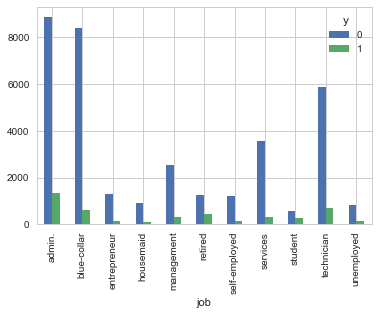

In [60]:
pd.crosstab(data["job"],data["y"]).plot(kind = "bar")

In [61]:
pd.crosstab(data["job"],data["y"])

y,0,1
job,,
admin.,8858,1320
blue-collar,8381,619
entrepreneur,1297,120
housemaid,925,103
management,2526,324
retired,1246,423
self-employed,1229,147
services,3544,316
student,587,264


In [62]:
pd.crosstab(data["job"],data["y"]).sum(1)

job
admin.           10178
blue-collar       9000
entrepreneur      1417
housemaid         1028
management        2850
retired           1669
self-employed     1376
services          3860
student            851
technician        6580
unemployed         982
dtype: int64

In [63]:
pd.crosstab(data["job"],data["y"]).div(pd.crosstab(data["job"],data["y"]).sum(1), axis =0)

y,0,1
job,,
admin.,0.870309,0.129691
blue-collar,0.931222,0.068778
entrepreneur,0.915314,0.084686
housemaid,0.899805,0.100195
management,0.886316,0.113684
retired,0.746555,0.253445
self-employed,0.893169,0.106831
services,0.918135,0.081865
student,0.689777,0.310223


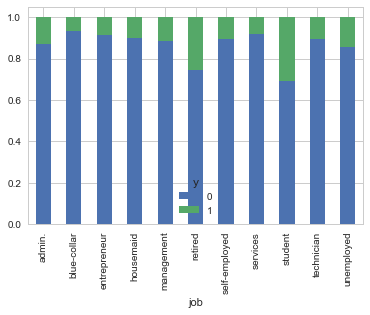

In [64]:
pd.crosstab(data["job"],data["y"]).div(pd.crosstab(data["job"],data["y"]).sum(1), axis =0).plot(kind = "bar", stacked= True)

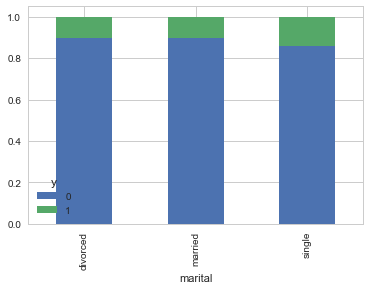

In [65]:
pd.crosstab(data["marital"],data["y"]).div(pd.crosstab(data["marital"],data["y"]).sum(1), axis =0).plot(kind = "bar", stacked= True)

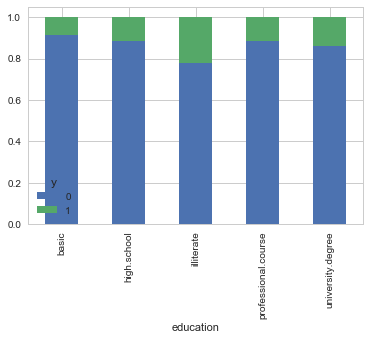

In [66]:
table = pd.crosstab(data["education"],data["y"])
plot_data = table.div(table.sum(1), axis =0)
plot_data.plot(kind = "bar", stacked= True)

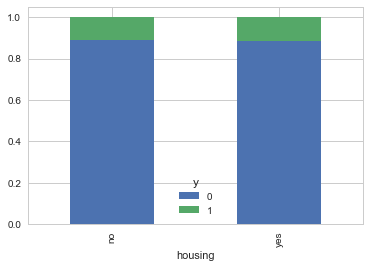

In [67]:
table = pd.crosstab(data["housing"],data["y"])
plot_data = table.div(table.sum(1), axis =0)
plot_data.plot(kind = "bar", stacked= True)

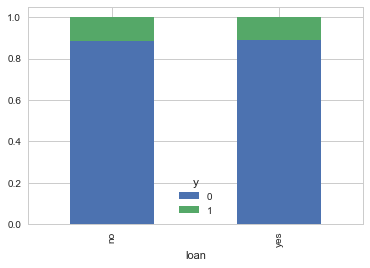

In [68]:
table = pd.crosstab(data["loan"],data["y"])
plot_data = table.div(table.sum(1), axis =0)
plot_data.plot(kind = "bar", stacked= True)

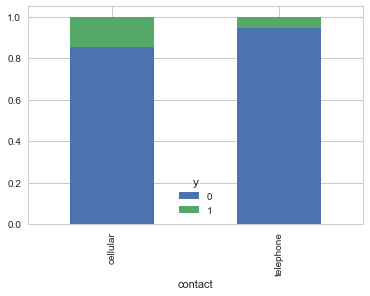

In [69]:
table = pd.crosstab(data["contact"],data["y"])
plot_data = table.div(table.sum(1), axis =0)
plot_data.plot(kind = "bar", stacked= True)

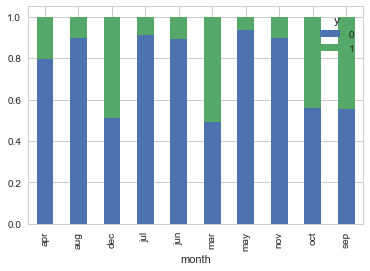

In [70]:

table = pd.crosstab(data["month"],data["y"])
plot_data = table.div(table.sum(1), axis =0)
plot_data.plot(kind = "bar", stacked= True)

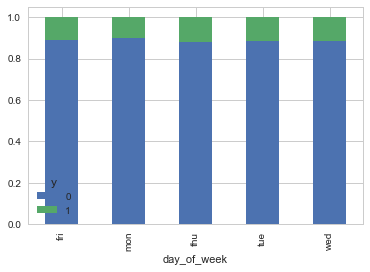

In [71]:
table = pd.crosstab(data["day_of_week"],data["y"])
plot_data = table.div(table.sum(1), axis =0)
plot_data.plot(kind = "bar", stacked= True)

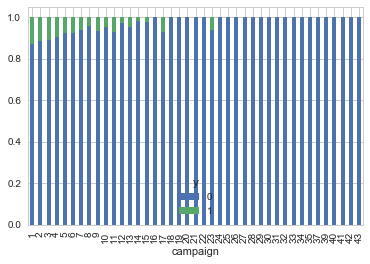

In [72]:
table = pd.crosstab(data["campaign"],data["y"])
plot_data = table.div(table.sum(1), axis =0)
plot_data.plot(kind = "bar", stacked= True)

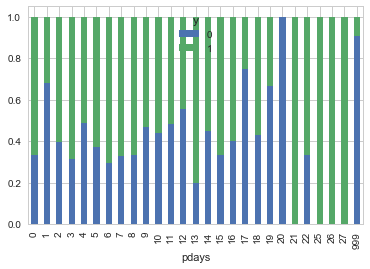

In [73]:
table = pd.crosstab(data["pdays"],data["y"])
plot_data = table.div(table.sum(1), axis =0)
plot_data.plot(kind = "bar", stacked= True)

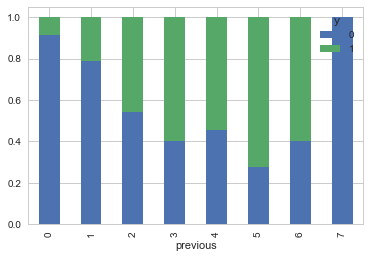

In [74]:
table = pd.crosstab(data["previous"],data["y"])
plot_data = table.div(table.sum(1), axis =0)
plot_data.plot(kind = "bar", stacked= True)

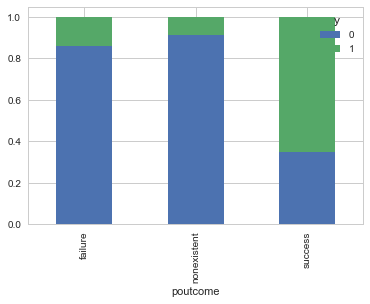

In [75]:
table = pd.crosstab(data["poutcome"],data["y"])
plot_data = table.div(table.sum(1), axis =0)
plot_data.plot(kind = "bar", stacked= True)

## Feauture Engineering

In [76]:
data.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')

In [77]:
data.dtypes

age                 int64
job                object
marital            object
education          object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

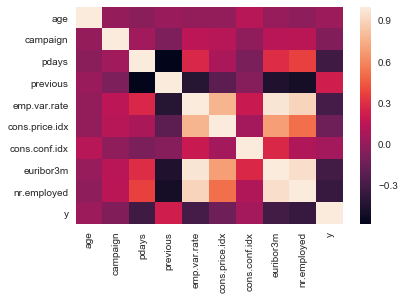

In [78]:
sns.heatmap(data.corr())


In [79]:
data.drop(columns = "previous", inplace = True)

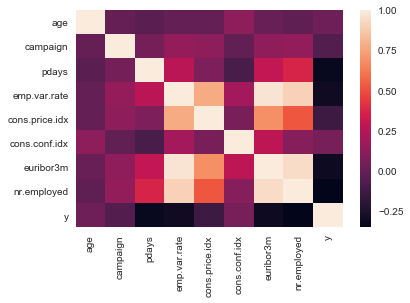

In [80]:
sns.heatmap(data.corr())


In [75]:
pandas_profiling.ProfileReport(data)

NameError: name 'pandas_profiling' is not defined

In [81]:
data.drop(columns = "euribor3m", inplace = True)

In [82]:
cat_data = data.select_dtypes(exclude = np.number)

In [83]:
num_data = data.select_dtypes(include = np.number)

In [84]:
cat_col_encoded = pd.get_dummies(cat_data)

In [85]:
data_preprocessed = pd.concat([num_data, cat_col_encoded], axis = "columns")

## Modelling

In [86]:
X = data_preprocessed.drop(columns = "y")

In [87]:
y = data_preprocessed["y"]

In [88]:
std = StandardScaler()
X_std = std.fit_transform(X)

In [89]:
norm = MinMaxScaler()
X_norm = norm.fit_transform(X)

In [90]:
def roc_draw(X_test, y_test,logreg):
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

In [91]:
def model_fit(model, X, y, roc = False, conf = False, threshold = 0.5):
    train_X, test_X, train_y, test_y =  train_test_split(X, y, test_size = 0.3, random_state=1)
    print(np.array(np.unique(test_y, return_counts=True)).T)
    model.fit(train_X, train_y)
    train_pred = model.predict(train_X)
    print("Train Accuracy : ",accuracy_score(train_pred,train_y))
    print("Train Recall : ",recall_score(train_y, train_pred))
    print("Train Precision : ",precision_score(train_y, train_pred))
    test_pred = model.predict(test_X)
    print("Test Accuracy : ",accuracy_score(test_pred,test_y))
    print("Test Recall : ",recall_score(test_y,test_pred))
    print("Test Precision : ",precision_score(test_y,test_pred))
    if roc:
        roc_draw(test_X, test_y, model)
    if conf:
        print("Test Data Confusion Matrix")
        print(confusion_matrix(test_pred,test_y))
    print("After Tuning Threshold")
    test_pred_prob = model.predict_proba(test_X)
    predict_threshold_test = np.where(test_pred_prob[:,1]>threshold,1,0)
    print("Test Accuracy : ",accuracy_score(predict_threshold_test,test_y))
    print("Test Recall : ",recall_score(test_y, predict_threshold_test))
    print("Test Precision : ",precision_score(test_y, predict_threshold_test))
    if conf:
        print("Test Data Confusion Matrix")
        print(confusion_matrix(predict_threshold_test,test_y))
        print(classification_report(test_y, predict_threshold_test))
    return model.predict_proba(train_X), model.predict_proba(test_X)


[[    0 10574]
 [    1  1364]]


C:\Users\knatarajan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train Accuracy :  0.8997235486303091
Train Recall :  0.1860986547085202
Train Precision :  0.6974789915966386
Test Accuracy :  0.8989780532752555
Test Recall :  0.18988269794721407
Test Precision :  0.7194444444444444


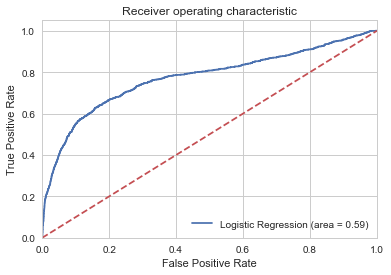

Test Data Confusion Matrix
[[10473  1105]
 [  101   259]]
After Tuning Threshold
Test Accuracy :  0.8875858602781035
Test Recall :  0.3951612903225806
Test Precision :  0.5104166666666666
Test Data Confusion Matrix
[[10057   825]
 [  517   539]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94     10574
           1       0.51      0.40      0.45      1364

    accuracy                           0.89     11938
   macro avg       0.72      0.67      0.69     11938
weighted avg       0.88      0.89      0.88     11938



In [92]:
logistic = LogisticRegression()
train_pred_prob, test_pred_prob = model_fit(logistic, X, y, roc = True, conf = True, threshold=0.3)

In [93]:
predict_threshold_test = np.where(test_pred_prob[:,1]>0.7,1,0)

In [94]:
data_preprocessed.y.value_counts()

0    35305
1     4486
Name: y, dtype: int64

In [95]:
np.where(logistic.predict_proba(X)[:,1]>0.5,1,0)

array([0, 0, 0, ..., 0, 0, 0])

In [96]:
logistic.predict_proba(X)

array([[0.95434328, 0.04565672],
       [0.95257325, 0.04742675],
       [0.954522  , 0.045478  ],
       ...,
       [0.63480388, 0.36519612],
       [0.6564209 , 0.3435791 ],
       [0.64955316, 0.35044684]])

In [97]:
model_fit(logistic, X_std, y)

[[    0 10574]
 [    1  1364]]
Train Accuracy :  0.9000825763831544
Train Recall :  0.22069186418962203
Train Precision :  0.6631376323387873
Test Accuracy :  0.8998994806500251
Test Recall :  0.22067448680351906
Test Precision :  0.6951501154734411
After Tuning Threshold
Test Accuracy :  0.8998994806500251
Test Recall :  0.22067448680351906
Test Precision :  0.6951501154734411


(array([[0.94159867, 0.05840133],
        [0.90730809, 0.09269191],
        [0.90756644, 0.09243356],
        ...,
        [0.96858352, 0.03141648],
        [0.94013368, 0.05986632],
        [0.90038376, 0.09961624]]), array([[0.79449909, 0.20550091],
        [0.82519049, 0.17480951],
        [0.96004986, 0.03995014],
        ...,
        [0.9686024 , 0.0313976 ],
        [0.67634152, 0.32365848],
        [0.67148249, 0.32851751]]))

In [98]:
model_fit(logistic, X_norm, y)

[[    0 10574]
 [    1  1364]]
Train Accuracy :  0.9004416041359997
Train Recall :  0.22101217168481743
Train Precision :  0.6692531522793405
Test Accuracy :  0.8996481822750879
Test Recall :  0.21407624633431085
Test Precision :  0.6985645933014354
After Tuning Threshold
Test Accuracy :  0.8996481822750879
Test Recall :  0.21407624633431085
Test Precision :  0.6985645933014354


C:\Users\knatarajan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(array([[0.94489675, 0.05510325],
        [0.90538129, 0.09461871],
        [0.90475807, 0.09524193],
        ...,
        [0.96932784, 0.03067216],
        [0.94044496, 0.05955504],
        [0.8985856 , 0.1014144 ]]), array([[0.79732216, 0.20267784],
        [0.82760071, 0.17239929],
        [0.96130803, 0.03869197],
        ...,
        [0.96641501, 0.03358499],
        [0.67849029, 0.32150971],
        [0.6818243 , 0.3181757 ]]))

In [99]:
lasso = LogisticRegression(penalty="l2")
model_fit(lasso, X_std, y)

[[    0 10574]
 [    1  1364]]
Train Accuracy :  0.9000825763831544
Train Recall :  0.22069186418962203
Train Precision :  0.6631376323387873
Test Accuracy :  0.8998994806500251
Test Recall :  0.22067448680351906
Test Precision :  0.6951501154734411
After Tuning Threshold
Test Accuracy :  0.8998994806500251
Test Recall :  0.22067448680351906
Test Precision :  0.6951501154734411


(array([[0.94159867, 0.05840133],
        [0.90730809, 0.09269191],
        [0.90756644, 0.09243356],
        ...,
        [0.96858352, 0.03141648],
        [0.94013368, 0.05986632],
        [0.90038376, 0.09961624]]), array([[0.79449909, 0.20550091],
        [0.82519049, 0.17480951],
        [0.96004986, 0.03995014],
        ...,
        [0.9686024 , 0.0313976 ],
        [0.67634152, 0.32365848],
        [0.67148249, 0.32851751]]))

In [100]:
knn = KNeighborsClassifier()
model_fit(knn, X_std, y)

[[    0 10574]
 [    1  1364]]
Train Accuracy :  0.9124331310810325
Train Recall :  0.36483023702754647
Train Precision :  0.7141065830721003
Test Accuracy :  0.8913553359021612
Test Recall :  0.2631964809384164
Test Precision :  0.5514592933947773
After Tuning Threshold


KeyboardInterrupt: 

In [101]:
nb = GaussianNB()
model_fit(nb, X_std, y)

[[    0 10574]
 [    1  1364]]
Train Accuracy :  0.8678059814023624
Train Recall :  0.4298526585522101
Train Precision :  0.41368680641183725
Test Accuracy :  0.8715027642821243
Test Recall :  0.43255131964809385
Test Precision :  0.43703703703703706
After Tuning Threshold
Test Accuracy :  0.8715027642821243
Test Recall :  0.43255131964809385
Test Precision :  0.43703703703703706


(array([[9.99999999e-01, 6.33990332e-10],
        [9.99968698e-01, 3.13020073e-05],
        [9.99968051e-01, 3.19490530e-05],
        ...,
        [9.99999899e-01, 1.01481249e-07],
        [9.99994173e-01, 5.82684258e-06],
        [9.99970289e-01, 2.97106357e-05]]),
 array([[9.41246168e-01, 5.87538323e-02],
        [9.91915616e-01, 8.08438431e-03],
        [9.99999790e-01, 2.09668522e-07],
        ...,
        [9.99998344e-01, 1.65606353e-06],
        [9.99196813e-01, 8.03187096e-04],
        [9.93248198e-01, 6.75180193e-03]]))

In [102]:
bnb = BernoulliNB()
model_fit(bnb, X_std, y)

[[    0 10574]
 [    1  1364]]
Train Accuracy :  0.8383657056690482
Train Recall :  0.5102498398462524
Train Precision :  0.34888304862023656
Test Accuracy :  0.8404255319148937
Test Recall :  0.5197947214076246
Test Precision :  0.3619193466054109
After Tuning Threshold
Test Accuracy :  0.8404255319148937
Test Recall :  0.5197947214076246
Test Precision :  0.3619193466054109


(array([[9.99150127e-01, 8.49873208e-04],
        [9.39751272e-01, 6.02487276e-02],
        [9.08133317e-01, 9.18666829e-02],
        ...,
        [9.99272733e-01, 7.27266624e-04],
        [9.91362077e-01, 8.63792319e-03],
        [9.23675171e-01, 7.63248292e-02]]),
 array([[4.43289494e-01, 5.56710506e-01],
        [6.96291677e-01, 3.03708323e-01],
        [9.99301621e-01, 6.98378738e-04],
        ...,
        [9.92430575e-01, 7.56942546e-03],
        [7.25189899e-01, 2.74810101e-01],
        [4.38452066e-01, 5.61547934e-01]]))

In [103]:
data.y.value_counts()

0    35305
1     4486
Name: y, dtype: int64

In [104]:
import imblearn
imblearn.__version__

'0.6.1'

In [105]:
from imblearn.under_sampling import NearMiss

In [106]:
undersample = NearMiss()

In [107]:
X_undersample, y_undersample = undersample.fit_sample(data_preprocessed.drop(columns="y"),data_preprocessed["y"])

In [108]:
print(np.array(np.unique(y_undersample, return_counts=True)).T)


[[   0 4486]
 [   1 4486]]


[[   0 1358]
 [   1 1334]]


C:\Users\knatarajan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train Accuracy :  0.8039808917197452
Train Recall :  0.7471446700507615
Train Precision :  0.8443886697741125
Test Accuracy :  0.8023774145616642
Test Recall :  0.7428785607196402
Test Precision :  0.8398305084745763


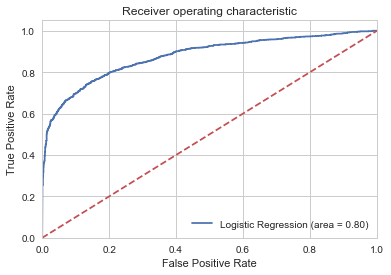

Test Data Confusion Matrix
[[1169  343]
 [ 189  991]]
After Tuning Threshold
Test Accuracy :  0.7622585438335809
Test Recall :  0.868815592203898
Test Precision :  0.7136699507389163
Test Data Confusion Matrix
[[ 893  175]
 [ 465 1159]]
              precision    recall  f1-score   support

           0       0.84      0.66      0.74      1358
           1       0.71      0.87      0.78      1334

    accuracy                           0.76      2692
   macro avg       0.77      0.76      0.76      2692
weighted avg       0.78      0.76      0.76      2692



In [109]:
logistic = LogisticRegression()
train_pred_prob, test_pred_prob = model_fit(logistic, X_undersample, y_undersample, roc = True, conf = True, threshold=0.3)

In [ ]:
 pip install dtreeplt

In [110]:
from dtreeplt import dtreeplt

In [111]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
dt = DecisionTreeClassifier()

In [214]:
dt.fit( X_undersample, y_undersample)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [117]:
X_undersample_predict = dt.predict(X_undersample)

In [118]:
accuracy_score(y_undersample, X_undersample_predict)

0.9570887204636648

[[   0 1358]
 [   1 1334]]
Train Accuracy :  0.9665605095541401
Train Recall :  0.9343274111675127
Train Precision :  0.9989823609226595
Test Accuracy :  0.7462852897473997
Test Recall :  0.7151424287856072
Test Precision :  0.7589498806682577


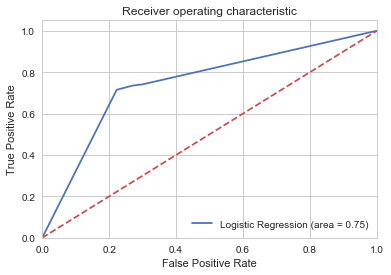

Test Data Confusion Matrix
[[1055  380]
 [ 303  954]]
After Tuning Threshold
Test Accuracy :  0.724739970282318
Test Recall :  0.7391304347826086
Test Precision :  0.7150108774474256
Test Data Confusion Matrix
[[965 348]
 [393 986]]
              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1358
           1       0.72      0.74      0.73      1334

    accuracy                           0.72      2692
   macro avg       0.72      0.72      0.72      2692
weighted avg       0.73      0.72      0.72      2692



In [119]:
train_pred_prob, test_pred_prob = model_fit(dt, X_undersample, y_undersample, roc = True, conf = True, threshold=0.3)

In [201]:
from dtreeplt import dtreeplt

In [209]:
y_undersample.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [215]:
dtree = dtreeplt(
    model=dt,
    feature_names=list(X_undersample.columns), target_names=list('y'))
fig = dtree.view()



IndexError: list index out of range

In [120]:
X_undersample.shape

(8972, 50)

In [126]:
def model_fit_dt(model, X, y, roc = False, conf = False, threshold = 0.5):
    train_X, test_X, train_y, test_y =  train_test_split(X, y, test_size = 0.3, random_state=1)
    print(np.array(np.unique(test_y, return_counts=True)).T)
    model.fit(train_X, train_y)
    train_pred = model.predict(train_X)
    print("Train Accuracy : ",accuracy_score(train_pred,train_y))
    #print("Train Recall : ",recall_score(train_y, train_pred))
    #print("Train Precision : ",precision_score(train_y, train_pred))
    test_pred = model.predict(test_X)
    print("Test Accuracy : ",accuracy_score(test_pred,test_y))
    #print("Test Recall : ",recall_score(test_y,test_pred))
    #print("Test Precision : ",precision_score(test_y,test_pred))
    if roc:
        roc_draw(test_X, test_y, model)
    if conf:
        print("Test Data Confusion Matrix")
        print(confusion_matrix(test_pred,test_y))
    #print("After Tuning Threshold")
    ##test_pred_prob = model.predict_proba(test_X)
    #predict_threshold_test = np.where(test_pred_prob[:,1]>threshold,1,0)
    #print("Test Accuracy : ",accuracy_score(predict_threshold_test,test_y))
    #print("Test Recall : ",recall_score(test_y, predict_threshold_test))
    #print("Test Precision : ",precision_score(test_y, predict_threshold_test))
    if conf:
        print("Test Data Confusion Matrix")
        print(confusion_matrix(predict_threshold_test,test_y))
        print(classification_report(test_y, predict_threshold_test))
    return accuracy_score(train_pred,train_y), accuracy_score(test_pred,test_y)


In [121]:
max_depth_check = [5,10,15,20,25,30,35,40,45,50]

In [131]:
def check_dept(max_depth_check):
    train_acc_list= []
    test_acc_list = []
    for i in max_depth_check:
        print("Max_ Depth ----------------------- = ",i)
        dt = DecisionTreeClassifier(max_depth=i)
        train_acc, test_acc = model_fit_dt(dt, X_undersample, y_undersample, roc = False, conf = False, threshold=0.3)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
    return train_acc_list, test_acc_list

In [133]:
train_acc, test_acc = check_dept(max_depth_check)

Max_ Depth ----------------------- =  5
[[   0 1358]
 [   1 1334]]
Train Accuracy :  0.7990445859872611
Test Accuracy :  0.787518573551263
Max_ Depth ----------------------- =  10
[[   0 1358]
 [   1 1334]]
Train Accuracy :  0.85
Test Accuracy :  0.7893759286775631
Max_ Depth ----------------------- =  15
[[   0 1358]
 [   1 1334]]
Train Accuracy :  0.9
Test Accuracy :  0.7767459138187222
Max_ Depth ----------------------- =  20
[[   0 1358]
 [   1 1334]]
Train Accuracy :  0.9363057324840764
Test Accuracy :  0.7611441307578009
Max_ Depth ----------------------- =  25
[[   0 1358]
 [   1 1334]]
Train Accuracy :  0.9605095541401274
Test Accuracy :  0.7429420505200595
Max_ Depth ----------------------- =  30
[[   0 1358]
 [   1 1334]]
Train Accuracy :  0.9665605095541401
Test Accuracy :  0.7455423476968797
Max_ Depth ----------------------- =  35
[[   0 1358]
 [   1 1334]]
Train Accuracy :  0.9665605095541401
Test Accuracy :  0.7444279346210996
Max_ Depth ----------------------- =  40
[[ 

In [137]:
resut = pd.DataFrame([max_depth_check,train_acc,test_acc]).T

In [138]:
resut.columns = ["max_depth", "train", "test"]

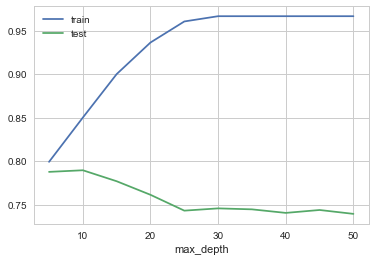

In [140]:
resut.plot(x = "max_depth",y=["train","test"])

In [141]:
max_depth_check = [2,3,4,5,6,7,8,9,10]

In [142]:
def check_dept(max_depth_check):
    train_acc_list= []
    test_acc_list = []
    for i in max_depth_check:
        print("Max_ Depth ----------------------- = ",i)
        dt = DecisionTreeClassifier(max_depth=i)
        train_acc, test_acc = model_fit_dt(dt, X_undersample, y_undersample, roc = False, conf = False, threshold=0.3)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
    return train_acc_list, test_acc_list

In [143]:
train_acc, test_acc = check_dept(max_depth_check)

Max_ Depth ----------------------- =  2
[[   0 1358]
 [   1 1334]]
Train Accuracy :  0.7546178343949045
Test Accuracy :  0.7529717682020802
Max_ Depth ----------------------- =  3
[[   0 1358]
 [   1 1334]]
Train Accuracy :  0.7818471337579618
Test Accuracy :  0.7711738484398217
Max_ Depth ----------------------- =  4
[[   0 1358]
 [   1 1334]]
Train Accuracy :  0.7901273885350318
Test Accuracy :  0.7812035661218425
Max_ Depth ----------------------- =  5
[[   0 1358]
 [   1 1334]]
Train Accuracy :  0.7990445859872611
Test Accuracy :  0.787518573551263
Max_ Depth ----------------------- =  6
[[   0 1358]
 [   1 1334]]
Train Accuracy :  0.8057324840764332
Test Accuracy :  0.7897473997028231
Max_ Depth ----------------------- =  7
[[   0 1358]
 [   1 1334]]
Train Accuracy :  0.8113057324840764
Test Accuracy :  0.7897473997028231
Max_ Depth ----------------------- =  8
[[   0 1358]
 [   1 1334]]
Train Accuracy :  0.8280254777070064
Test Accuracy :  0.7916047548291233
Max_ Depth ----------

In [144]:
resut = pd.DataFrame([max_depth_check,train_acc,test_acc]).T

In [145]:
resut.columns = ["max_depth", "train", "test"]

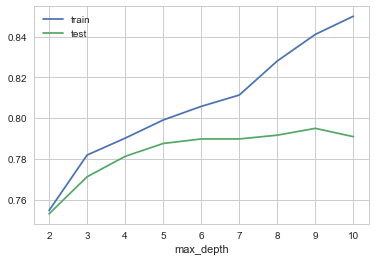

In [146]:
resut.plot(x = "max_depth",y=["train","test"])

In [150]:
type_criterion = ["gini", "entropy"]

In [151]:
def check_dept(type_criterion):
    train_acc_list= []
    test_acc_list = []
    for i in type_criterion:
        print("Max_ Depth ----------------------- = ",i)
        dt = DecisionTreeClassifier(criterion=i, max_depth=9)
        train_acc, test_acc = model_fit_dt(dt, X_undersample, y_undersample, roc = False, conf = False, threshold=0.3)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
    return train_acc_list, test_acc_list

In [152]:
train_acc, test_acc = check_dept(type_criterion)

Max_ Depth ----------------------- =  gini
[[   0 1358]
 [   1 1334]]
Train Accuracy :  0.8412420382165605
Test Accuracy :  0.7919762258543833
Max_ Depth ----------------------- =  entropy
[[   0 1358]
 [   1 1334]]
Train Accuracy :  0.8343949044585988
Test Accuracy :  0.7971768202080238


In [157]:
resut = pd.DataFrame([type_criterion,train_acc,test_acc]).T

In [158]:
resut.columns = ["criterion", "train", "test"]

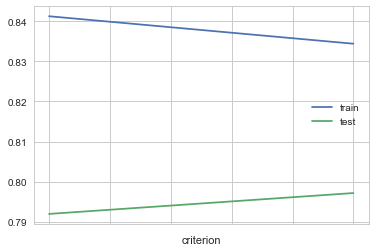

In [159]:
resut.plot(x = "criterion",y=["train","test"])

In [160]:
data_preprocessed.head()

,age,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,y,job_admin.,job_blue-collar,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,1.1,93.994,-36.4,5191.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,1.1,93.994,-36.4,5191.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,1.1,93.994,-36.4,5191.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,1.1,93.994,-36.4,5191.0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,1.1,93.994,-36.4,5191.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [176]:
min_samples_split = [20,21,22,23,24,25,26]

In [177]:
def check_dept(min_samples_split):
    train_acc_list= []
    test_acc_list = []
    for i in min_samples_split:
        print("Minimun Sample split ----------------------- = ",i)
        dt = DecisionTreeClassifier(criterion="gini", max_depth=9,min_samples_split=i)
        train_acc, test_acc = model_fit_dt(dt, X_undersample, y_undersample, roc = False, conf = False, threshold=0.3)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
    return train_acc_list, test_acc_list

In [178]:
train_acc, test_acc = check_dept(min_samples_split)

Minimun Sample split ----------------------- =  20
[[   0 1358]
 [   1 1334]]
Train Accuracy :  0.8308917197452229
Test Accuracy :  0.8023774145616642
Minimun Sample split ----------------------- =  21
[[   0 1358]
 [   1 1334]]
Train Accuracy :  0.8304140127388535
Test Accuracy :  0.8008915304606241
Minimun Sample split ----------------------- =  22
[[   0 1358]
 [   1 1334]]
Train Accuracy :  0.8304140127388535
Test Accuracy :  0.8012630014858841
Minimun Sample split ----------------------- =  23
[[   0 1358]
 [   1 1334]]
Train Accuracy :  0.8304140127388535
Test Accuracy :  0.8012630014858841
Minimun Sample split ----------------------- =  24
[[   0 1358]
 [   1 1334]]
Train Accuracy :  0.8304140127388535
Test Accuracy :  0.8008915304606241
Minimun Sample split ----------------------- =  25
[[   0 1358]
 [   1 1334]]
Train Accuracy :  0.8304140127388535
Test Accuracy :  0.8016344725111442
Minimun Sample split ----------------------- =  26
[[   0 1358]
 [   1 1334]]
Train Accuracy :

In [179]:
resut = pd.DataFrame([min_samples_split,train_acc,test_acc]).T

In [180]:
resut.columns = ["min_samples_split", "train", "test"]

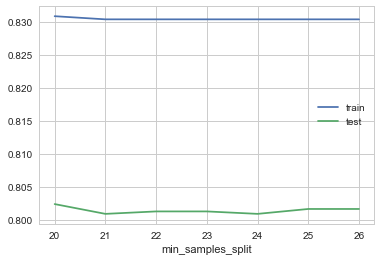

In [181]:
resut.plot(x = "min_samples_split",y=["train","test"])

In [192]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [189]:

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = [
{ 'max_features': [ 0.2, 0.3, 0.4,0.6,0.8,1  ], 'min_samples_split': [18,19,20],
   'max_depth' : [7,8,9]
}
]

tree = DecisionTreeClassifier()

grid_search = GridSearchCV(tree, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_undersample, y_undersample)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [7, 8, 9],
                          '

In [190]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=19,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [191]:
grid_search.best_score_

0.7326629472654456

In [193]:
grid_search = RandomizedSearchCV(tree, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_undersample, y_undersample)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
         

In [194]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=0.4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [195]:
from sklearn.ensemble import RandomForestClassifier

In [218]:
random_classifier = RandomForestClassifier(n_estimators=70)

In [219]:
random_classifier.fit(X_undersample, y_undersample)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [220]:
X_undersample_pred_random = random_classifier.predict(X_undersample)

In [221]:
accuracy_score(y_undersample, X_undersample_pred_random)

0.9570887204636648

In [223]:
random_classifier.feature_importances_

array([1.69450089e-01, 1.03612486e-01, 2.78918377e-02, 5.37659993e-02,
       3.03860278e-02, 4.76164207e-02, 1.34853461e-01, 1.55136918e-02,
       3.02078793e-02, 4.94576077e-03, 2.29237921e-03, 8.31739822e-03,
       3.30891430e-03, 5.00780951e-03, 7.54762635e-03, 3.66972458e-03,
       9.23674035e-03, 2.90274965e-03, 1.21561991e-02, 1.55090845e-02,
       1.36273723e-02, 1.95374750e-02, 1.20225612e-02, 1.14089686e-04,
       8.46753466e-03, 1.24283305e-02, 1.79931168e-02, 1.79792037e-02,
       1.54910599e-02, 1.42745275e-02, 7.61445254e-03, 7.26282850e-03,
       6.73994604e-03, 5.65785483e-03, 1.55947374e-04, 2.95615720e-03,
       4.04029645e-03, 2.58433784e-03, 1.01454839e-02, 2.12174442e-03,
       4.99653316e-03, 9.41189772e-04, 1.62037993e-02, 1.61275144e-02,
       1.65671621e-02, 1.52490957e-02, 1.63546931e-02, 6.90889628e-03,
       3.04506686e-02, 6.79384714e-03])

In [224]:
X_undersample.columns

Index(['age', 'campaign', 'pdays', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'nr.employed', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [227]:
feature_imp = pd.DataFrame([X_undersample.columns,random_classifier.feature_importances_]).T

In [228]:
feature_imp.columns = ["columns","importance"]

In [230]:
feature_imp

,columns,importance
0,age,0.16945
1,campaign,0.103612
2,pdays,0.0278918
3,emp.var.rate,0.053766
4,cons.price.idx,0.030386
5,cons.conf.idx,0.0476164
6,nr.employed,0.134853
7,job_admin.,0.0155137
8,job_blue-collar,0.0302079
9,job_entrepreneur,0.00494576


In [237]:
feature_imp.sort_values(by=['importance'],ascending=False, inplace=True)

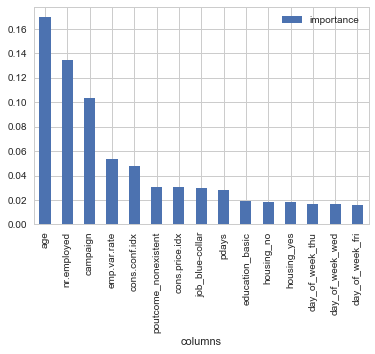

In [244]:
feature_imp.head(15).plot(x = "columns", kind = "bar")

In [253]:
imp_col = feature_imp.head(10)["columns"]

[[   0 1358]
 [   1 1334]]
Train Accuracy :  0.8724522292993631
Train Recall :  0.8131345177664975
Train Precision :  0.9236036036036036
Test Accuracy :  0.7771173848439822
Test Recall :  0.724887556221889
Test Precision :  0.8058333333333333


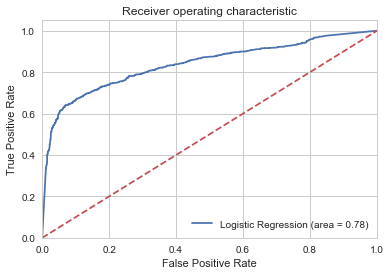

Test Data Confusion Matrix
[[1125  367]
 [ 233  967]]
After Tuning Threshold
Test Accuracy :  0.7771173848439822
Test Recall :  0.724887556221889
Test Precision :  0.8058333333333333
Test Data Confusion Matrix
[[1125  367]
 [ 233  967]]
              precision    recall  f1-score   support

           0       0.75      0.83      0.79      1358
           1       0.81      0.72      0.76      1334

    accuracy                           0.78      2692
   macro avg       0.78      0.78      0.78      2692
weighted avg       0.78      0.78      0.78      2692



(array([[0.89627542, 0.10372458],
        [0.70495927, 0.29504073],
        [0.05619048, 0.94380952],
        ...,
        [0.91182889, 0.08817111],
        [0.865356  , 0.134644  ],
        [0.91805946, 0.08194054]]), array([[0.01428571, 0.98571429],
        [0.20904762, 0.79095238],
        [0.        , 1.        ],
        ...,
        [0.05714286, 0.94285714],
        [0.93968254, 0.06031746],
        [0.56878118, 0.43121882]]))

In [254]:
model_fit(random_classifier,X_undersample[imp_col],y_undersample,roc=True,conf=True)

[[   0 1358]
 [   1 1334]]
Train Accuracy :  0.9664012738853504
Train Recall :  0.9508248730964467
Train Precision :  0.9816573861775303
Test Accuracy :  0.7797176820208024
Test Recall :  0.7368815592203898
Test Precision :  0.8024489795918367


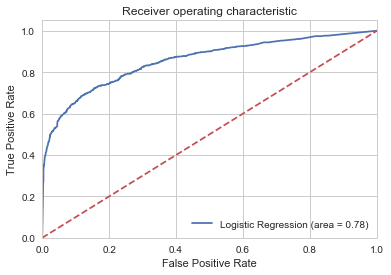

After Tuning Threshold
Test Accuracy :  0.7797176820208024
Test Recall :  0.7368815592203898
Test Precision :  0.8024489795918367


(array([[1.        , 0.        ],
        [0.98748299, 0.01251701],
        [0.20333333, 0.79666667],
        ...,
        [1.        , 0.        ],
        [0.17142857, 0.82857143],
        [0.85116007, 0.14883993]]), array([[0.32857143, 0.67142857],
        [0.28571429, 0.71428571],
        [0.        , 1.        ],
        ...,
        [0.17714286, 0.82285714],
        [0.6       , 0.4       ],
        [0.3347619 , 0.6652381 ]]))

In [222]:
model_fit(random_classifier,X_undersample,y_undersample,roc= True)

In [216]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = [
{ 
   'n_estimators' : [20, 50, 70, 100, 200]
}
]

tree = RandomForestClassifier()

grid_search = GridSearchCV(tree, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_undersample, y_undersample)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [217]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [255]:
from sklearn.ensemble import AdaBoostClassifier

In [256]:
ada = AdaBoostClassifier()

In [257]:
ada.fit(X_undersample,y_undersample)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [258]:
ada_pred = ada.predict(X_undersample)
accuracy_score(y_undersample, ada_pred)

0.8251226036558181

[[   0 1358]
 [   1 1334]]
Train Accuracy :  0.8248407643312102
Train Recall :  0.774746192893401
Train Precision :  0.8622881355932204
Test Accuracy :  0.8157503714710252
Test Recall :  0.7616191904047976
Test Precision :  0.8509212730318257


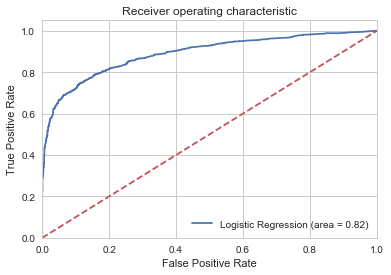

Test Data Confusion Matrix
[[1180  318]
 [ 178 1016]]
After Tuning Threshold
Test Accuracy :  0.8157503714710252
Test Recall :  0.7616191904047976
Test Precision :  0.8509212730318257
Test Data Confusion Matrix
[[1180  318]
 [ 178 1016]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1358
           1       0.85      0.76      0.80      1334

    accuracy                           0.82      2692
   macro avg       0.82      0.82      0.82      2692
weighted avg       0.82      0.82      0.82      2692



(array([[0.51292214, 0.48707786],
        [0.50720864, 0.49279136],
        [0.49864204, 0.50135796],
        ...,
        [0.51300826, 0.48699174],
        [0.50624345, 0.49375655],
        [0.51318217, 0.48681783]]), array([[0.47989029, 0.52010971],
        [0.50875037, 0.49124963],
        [0.29698253, 0.70301747],
        ...,
        [0.48918489, 0.51081511],
        [0.49217837, 0.50782163],
        [0.49923055, 0.50076945]]))

In [259]:
model_fit(ada,X_undersample, y_undersample, roc=True, conf=True)

In [260]:
n_tree = [40,50,60,70,80,90,100]

---------------Number of iteration------------ =  40
[[   0 1358]
 [   1 1334]]
Train Accuracy :  0.8221337579617835
Train Recall :  0.7722081218274112
Train Precision :  0.859159901164843
Test Accuracy :  0.8150074294205052
Test Recall :  0.7623688155922039
Test Precision :  0.8489148580968281


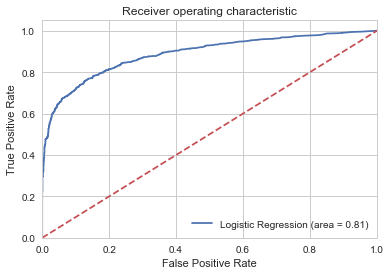

Test Data Confusion Matrix
[[1177  317]
 [ 181 1017]]
After Tuning Threshold
Test Accuracy :  0.8150074294205052
Test Recall :  0.7623688155922039
Test Precision :  0.8489148580968281
Test Data Confusion Matrix
[[1177  317]
 [ 181 1017]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1358
           1       0.85      0.76      0.80      1334

    accuracy                           0.82      2692
   macro avg       0.82      0.81      0.81      2692
weighted avg       0.82      0.82      0.81      2692

---------------Number of iteration------------ =  50
[[   0 1358]
 [   1 1334]]
Train Accuracy :  0.8248407643312102
Train Recall :  0.774746192893401
Train Precision :  0.8622881355932204
Test Accuracy :  0.8157503714710252
Test Recall :  0.7616191904047976
Test Precision :  0.8509212730318257


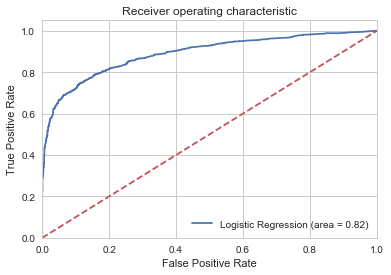

Test Data Confusion Matrix
[[1180  318]
 [ 178 1016]]
After Tuning Threshold
Test Accuracy :  0.8157503714710252
Test Recall :  0.7616191904047976
Test Precision :  0.8509212730318257
Test Data Confusion Matrix
[[1180  318]
 [ 178 1016]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1358
           1       0.85      0.76      0.80      1334

    accuracy                           0.82      2692
   macro avg       0.82      0.82      0.82      2692
weighted avg       0.82      0.82      0.82      2692

---------------Number of iteration------------ =  60
[[   0 1358]
 [   1 1334]]
Train Accuracy :  0.825
Train Recall :  0.7756979695431472
Train Precision :  0.861825872400423
Test Accuracy :  0.8161218424962853
Test Recall :  0.7638680659670165
Test Precision :  0.8498748957464554


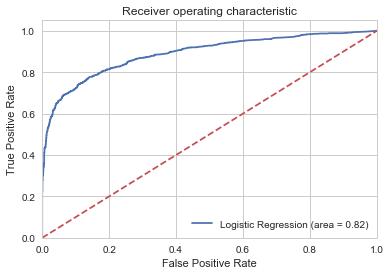

Test Data Confusion Matrix
[[1178  315]
 [ 180 1019]]
After Tuning Threshold
Test Accuracy :  0.8161218424962853
Test Recall :  0.7638680659670165
Test Precision :  0.8498748957464554
Test Data Confusion Matrix
[[1178  315]
 [ 180 1019]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1358
           1       0.85      0.76      0.80      1334

    accuracy                           0.82      2692
   macro avg       0.82      0.82      0.82      2692
weighted avg       0.82      0.82      0.82      2692

---------------Number of iteration------------ =  70
[[   0 1358]
 [   1 1334]]
Train Accuracy :  0.825796178343949
Train Recall :  0.7763324873096447
Train Precision :  0.8628349788434415
Test Accuracy :  0.8164933135215453
Test Recall :  0.7653673163418291
Test Precision :  0.8494176372712147


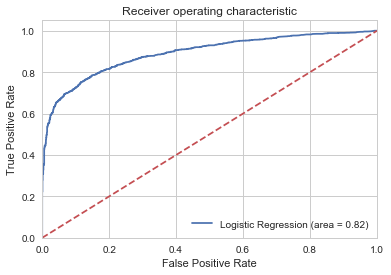

Test Data Confusion Matrix
[[1177  313]
 [ 181 1021]]
After Tuning Threshold
Test Accuracy :  0.8164933135215453
Test Recall :  0.7653673163418291
Test Precision :  0.8494176372712147
Test Data Confusion Matrix
[[1177  313]
 [ 181 1021]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1358
           1       0.85      0.77      0.81      1334

    accuracy                           0.82      2692
   macro avg       0.82      0.82      0.82      2692
weighted avg       0.82      0.82      0.82      2692

---------------Number of iteration------------ =  80
[[   0 1358]
 [   1 1334]]
Train Accuracy :  0.8259554140127389
Train Recall :  0.7776015228426396
Train Precision :  0.8621174815335912
Test Accuracy :  0.8157503714710252
Test Recall :  0.7631184407796102
Test Precision :  0.8497495826377296


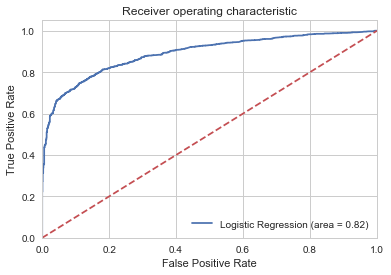

Test Data Confusion Matrix
[[1178  316]
 [ 180 1018]]
After Tuning Threshold
Test Accuracy :  0.8157503714710252
Test Recall :  0.7631184407796102
Test Precision :  0.8497495826377296
Test Data Confusion Matrix
[[1178  316]
 [ 180 1018]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1358
           1       0.85      0.76      0.80      1334

    accuracy                           0.82      2692
   macro avg       0.82      0.82      0.82      2692
weighted avg       0.82      0.82      0.82      2692

---------------Number of iteration------------ =  90
[[   0 1358]
 [   1 1334]]
Train Accuracy :  0.8273885350318472
Train Recall :  0.7782360406091371
Train Precision :  0.8643410852713178
Test Accuracy :  0.8179791976225854
Test Recall :  0.7661169415292354
Test Precision :  0.8516666666666667


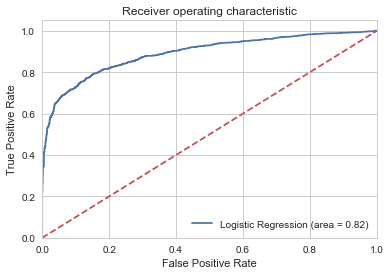

Test Data Confusion Matrix
[[1180  312]
 [ 178 1022]]
After Tuning Threshold
Test Accuracy :  0.8179791976225854
Test Recall :  0.7661169415292354
Test Precision :  0.8516666666666667
Test Data Confusion Matrix
[[1180  312]
 [ 178 1022]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1358
           1       0.85      0.77      0.81      1334

    accuracy                           0.82      2692
   macro avg       0.82      0.82      0.82      2692
weighted avg       0.82      0.82      0.82      2692

---------------Number of iteration------------ =  100
[[   0 1358]
 [   1 1334]]
Train Accuracy :  0.8272292993630573
Train Recall :  0.7769670050761421
Train Precision :  0.8650653479335924
Test Accuracy :  0.8183506686478454
Test Recall :  0.7653673163418291
Test Precision :  0.8529657477025898


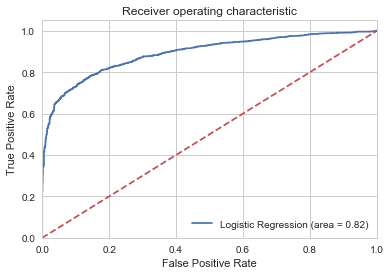

Test Data Confusion Matrix
[[1182  313]
 [ 176 1021]]
After Tuning Threshold
Test Accuracy :  0.8183506686478454
Test Recall :  0.7653673163418291
Test Precision :  0.8529657477025898
Test Data Confusion Matrix
[[1182  313]
 [ 176 1021]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1358
           1       0.85      0.77      0.81      1334

    accuracy                           0.82      2692
   macro avg       0.82      0.82      0.82      2692
weighted avg       0.82      0.82      0.82      2692



In [261]:
for i in n_tree:
    ada_tune = AdaBoostClassifier(n_estimators=i)
    print("---------------Number of iteration------------ = ",i)
    model_fit(ada_tune, X_undersample,y_undersample,roc=True, conf=True)

In [ ]:
ada.feature_importances_

In [262]:
feature_imp = pd.DataFrame([X_undersample.columns,ada.feature_importances_]).T

In [263]:
feature_imp.columns = ["columns","importance"]

In [264]:
feature_imp

,columns,importance
0,age,0.12
1,campaign,0.06
2,pdays,0.02
3,emp.var.rate,0.08
4,cons.price.idx,0.06
5,cons.conf.idx,0.1
6,nr.employed,0.14
7,job_admin.,0.02
8,job_blue-collar,0.02
9,job_entrepreneur,0.02


In [265]:
feature_imp.sort_values(by=['importance'],ascending=False, inplace=True)

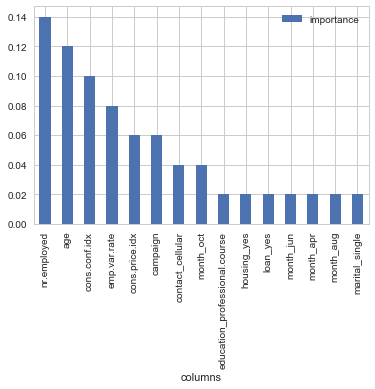

In [266]:
feature_imp.head(15).plot(x = "columns", kind = "bar")

In [253]:
imp_col = feature_imp.head(10)["columns"]

[[   0 1358]
 [   1 1334]]
Train Accuracy :  0.8036624203821656
Train Recall :  0.7300126903553299
Train Precision :  0.8576220648527767
Test Accuracy :  0.7949479940564635
Test Recall :  0.7241379310344828
Test Precision :  0.84


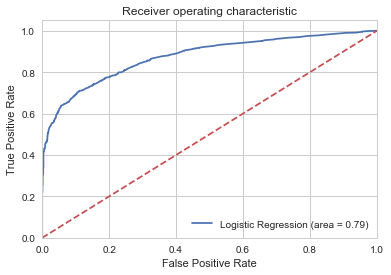

Test Data Confusion Matrix
[[1174  368]
 [ 184  966]]
After Tuning Threshold
Test Accuracy :  0.7949479940564635
Test Recall :  0.7241379310344828
Test Precision :  0.84
Test Data Confusion Matrix
[[1174  368]
 [ 184  966]]
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      1358
           1       0.84      0.72      0.78      1334

    accuracy                           0.79      2692
   macro avg       0.80      0.79      0.79      2692
weighted avg       0.80      0.79      0.79      2692



(array([[0.51039105, 0.48960895],
        [0.50346059, 0.49653941],
        [0.49968237, 0.50031763],
        ...,
        [0.51300172, 0.48699828],
        [0.50573012, 0.49426988],
        [0.50992261, 0.49007739]]), array([[0.48195802, 0.51804198],
        [0.50790792, 0.49209208],
        [0.29712962, 0.70287038],
        ...,
        [0.49772258, 0.50227742],
        [0.49729862, 0.50270138],
        [0.49716335, 0.50283665]]))

In [267]:
model_fit(ada,X_undersample[imp_col], y_undersample, roc=True, conf=True)

In [ ]:
'max_features': [ 0.2, 0.3, 0.4,0.6,0.8,1  ], 'min_samples_split': [18,19,20],